In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
words = open('/content/names.txt','r').read().splitlines()


In [ ]:
# Building Vocabulary of Characters

chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}


In [ ]:
def build_dataset(words):

  block = 3

  X, Y = [], []
  for w in words:
    context = [0] * block
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      context = context[1:] + [ix]


  X = torch.tensor(X)
  Y = torch.tensor(Y)

  return X, Y

In [ ]:
# Splitting the dataset

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])



In [ ]:
# Lookup Table for the characters

C = torch.randn((27,10),generator = g,requires_grad=True)


In [ ]:
# Hidden Layer

W1 = torch.randn((30,200),generator=g,requires_grad=True)
b1 = torch.randn(200,generator=g,requires_grad=True)

In [ ]:
# torch.cat(emb[:,0,:],emb[:,1,:],emb[:,2,:],dim=1)

# torch.cat(torch.unbind(emb,1),dim=1)

# emb.view(32,6)

h = torch.tanh(emb.view(-1,6) @ W1 + b1)


In [ ]:
# Output Layer

W2 = torch.randn((200,27),generator=g,requires_grad=True)
b2 = torch.randn(27,generator=g,requires_grad=True)

In [ ]:
logits = h @ W2 + b2

In [ ]:
# counts = logits.exp()
# probs = counts/counts.sum(1,keepdim=True)

g = torch.Generator().manual_seed(2147483647)

In [ ]:
# loss = -probs[torch.arange(32),Y].log().mean()

parameters = [C,W1,b1,W2,b2]
sum(p.nelement() for p in parameters)

# for p in parameters():
#   p.requires_grad = True

11897

In [ ]:
# For determining Ideal Learning Rate

lre = torch.linspace(-3,0,1000)
lrs = 10**lre

lri = []
lossi = []
stepi = []


In [ ]:
# Forward Pass


for i in range(50000):

    # Constructing mini Batches
  ix = torch.randint(0,Xtr.shape[0],(32,))


  emb = C[Xtr[ix]]
  h = torch.tanh(emb.view(-1,30) @ W1 + b1)
  logits = h @ W2 + b2
  loss = F.cross_entropy(logits,Ytr[ix])

  # Backward Pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # Update
  lr = 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # Track stats
  # lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.log10().item())


# print(loss.item())


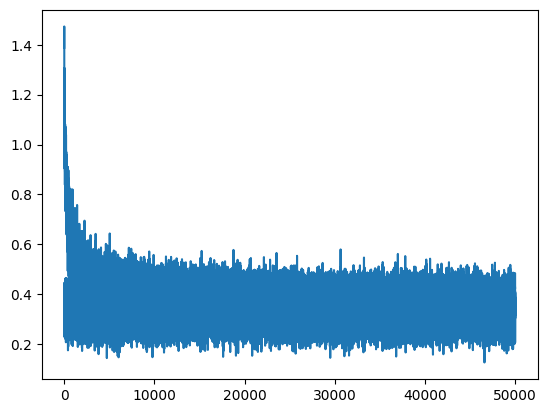

In [ ]:
plt.plot(stepi,lossi)

In [ ]:
emb = C[Xtr]
h = torch.tanh(emb.view(-1,30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits,Ytr)
loss

tensor(2.1571, grad_fn=<NllLossBackward0>)

In [ ]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1,30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits,Ydev)
loss

tensor(2.1847, grad_fn=<NllLossBackward0>)

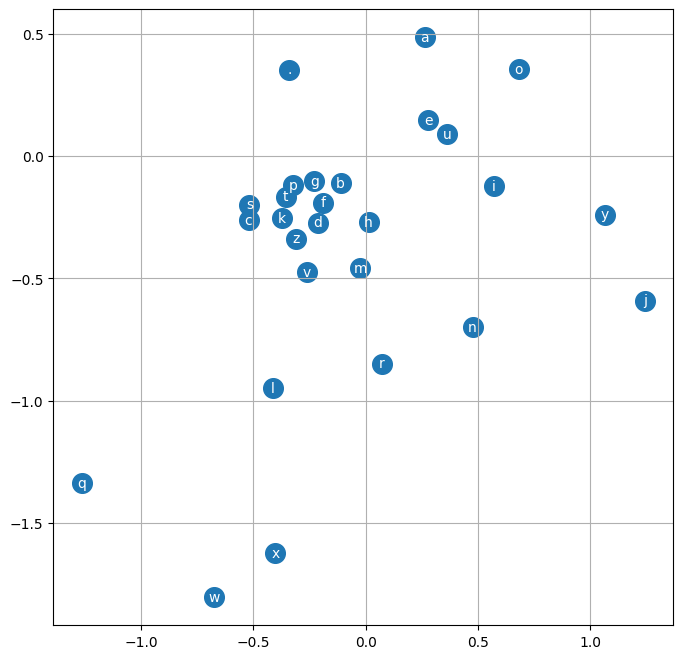

In [ ]:
# only 2x2 visualization of set C values

plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data,C[:,1].data,s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(),C[i,1].item(),itos[i],ha="center",va="center",color="white")
plt.grid("minor")

In [ ]:
# Sampling

gi = torch.Generator().manual_seed(2147483647+10)
block = 3
for _ in range(20):
  out = []
  context = [0] * block

  while True:
    emb = C[torch.tensor([context])]
    h = torch.tanh(emb.view(1,-1) @ W1 + b1)
    logits = h @ W2 + b2
    probs = F.softmax(logits,dim=1)
    ix = torch.multinomial(probs,num_samples=1,generator=gi).item()
    context = context[1:] + [ix]
    out.append(ix)
    if ix == 0:
      break

  print(''.join((itos[i]) for i in out))

mora.
mayah.
seel.
ndheyah.
rethan.
ejz.
leg.
adeerdoelii.
shi.
jelle.
elisso.
aarielle.
malaia.
nyshibergiai.
jest.
jair.
jelipunthudanu.
zence.
ryyahulyeh.
yuma.
